In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#load required libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

# Load Data

In [3]:
df_train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

**Train** data has 1460 rows and 81 columns AND **Test** data has 1459 rows and 80 columns

# Data Cleaning

In [6]:
#Function to get count of missing values in each column
def get_cols_with_missing_values(DataFrame):
    missing_na_columns=(DataFrame.isnull().sum())
    return missing_na_columns[missing_na_columns > 0]

In [7]:
#Missing values in train data
feature_with_na = get_cols_with_missing_values(df_train)
print(feature_with_na)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**Observation**: Target feature 'SalePrice' has no missing value

In [8]:
#Missing values in test data
feature_with_na = get_cols_with_missing_values(df_test)
print(feature_with_na)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


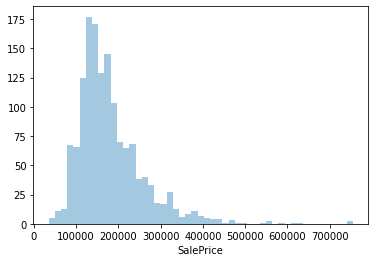

In [9]:
#distribution of values in target feature
sns.distplot(df_train.get("SalePrice"), kde=False)
plt.show()

**Observation**: The dependent feature 'SalePrice' is right skewed

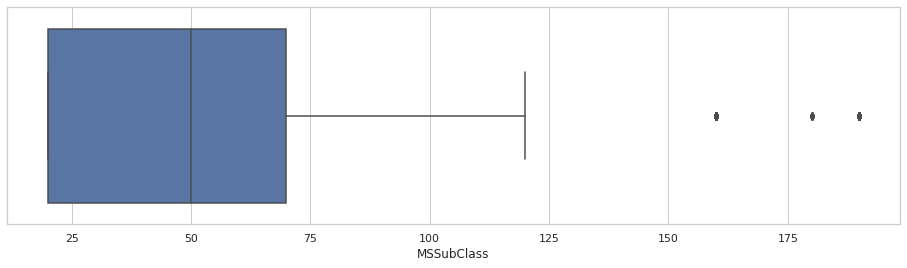

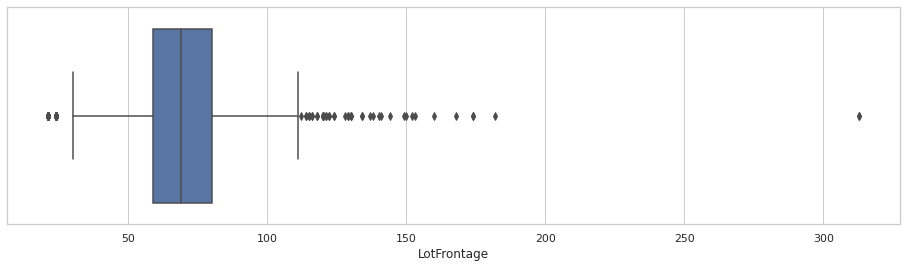

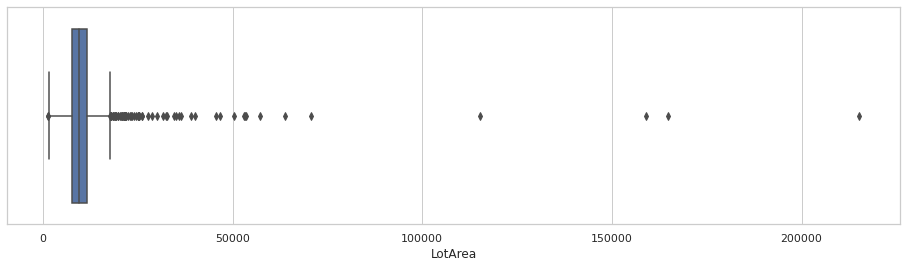

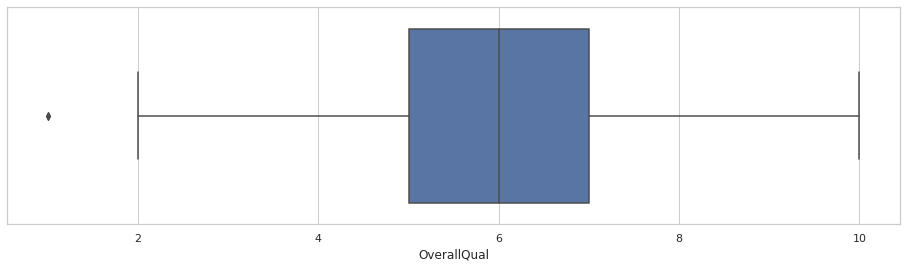

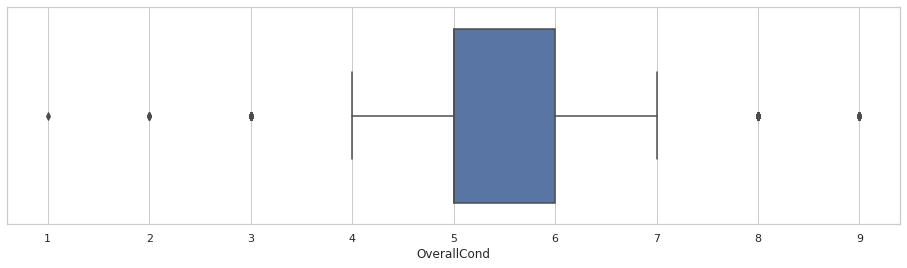

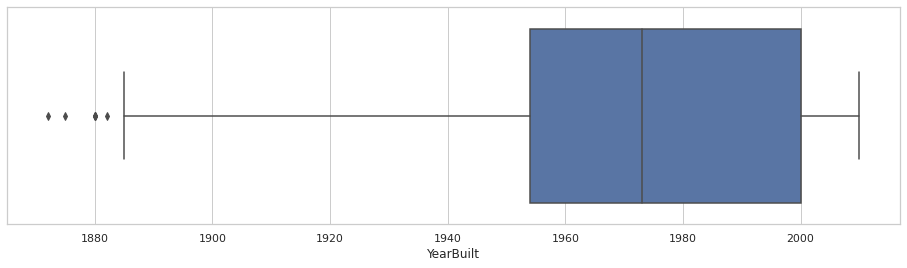

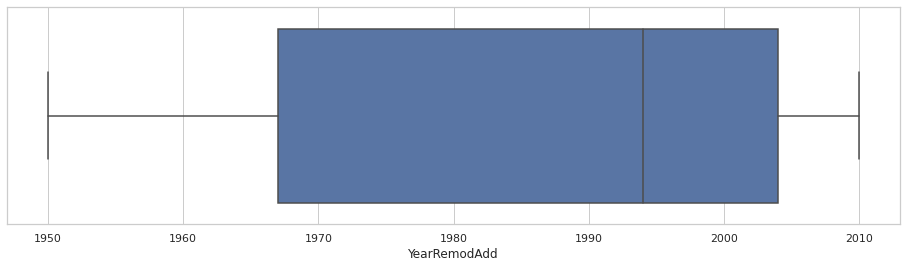

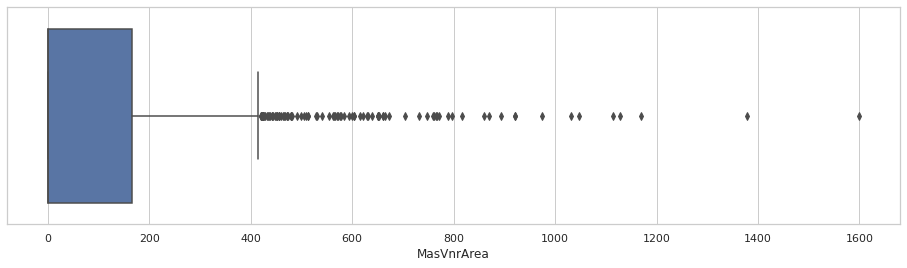

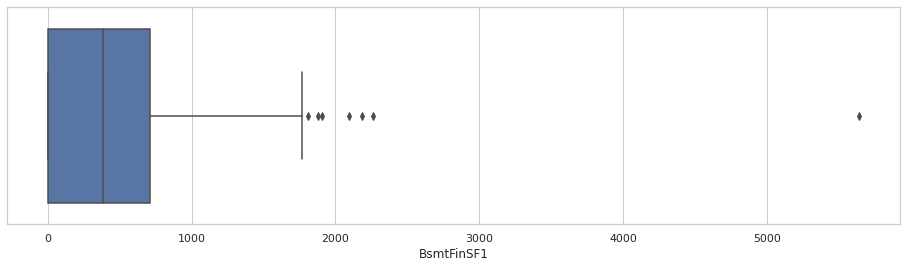

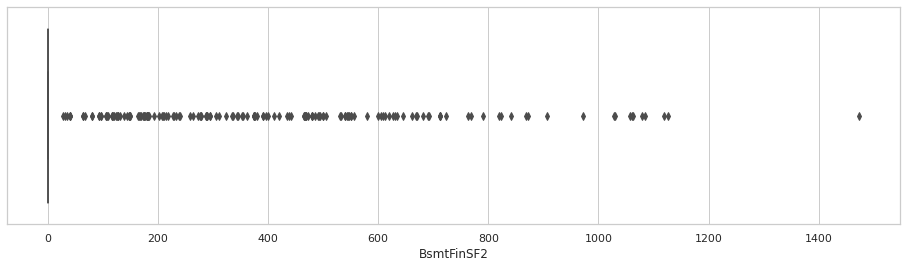

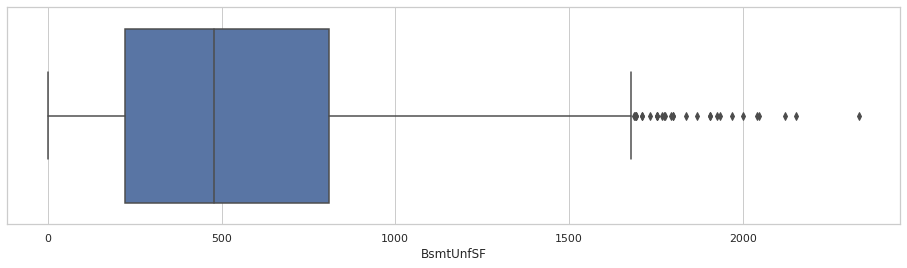

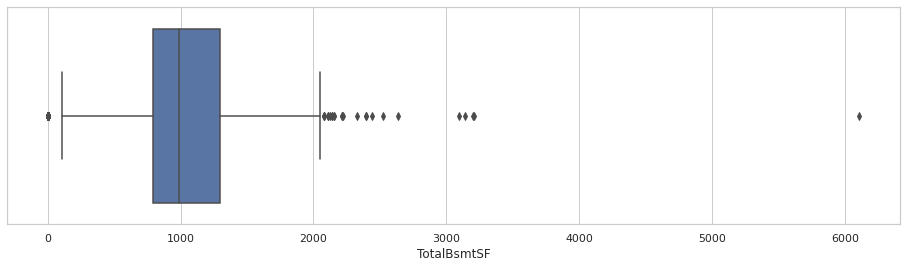

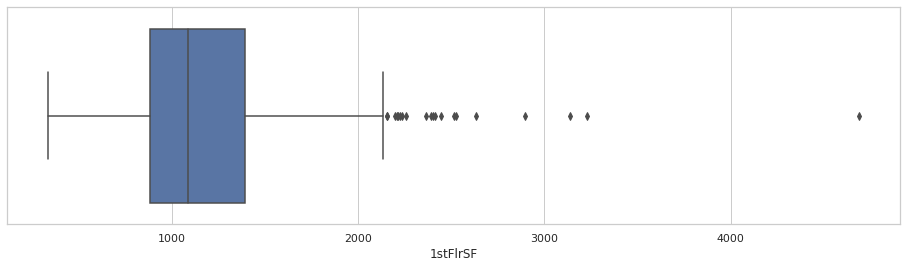

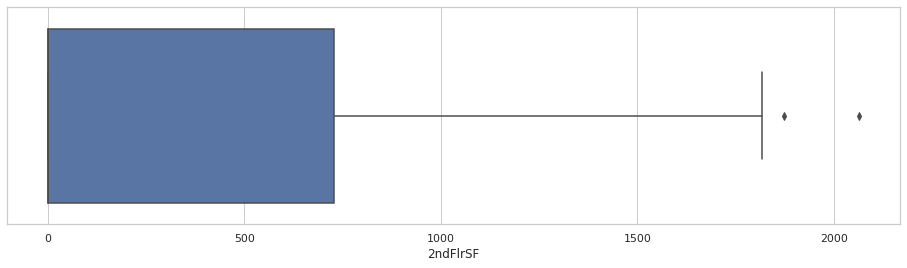

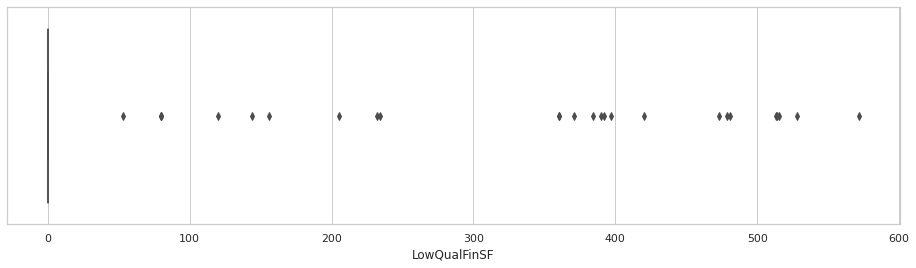

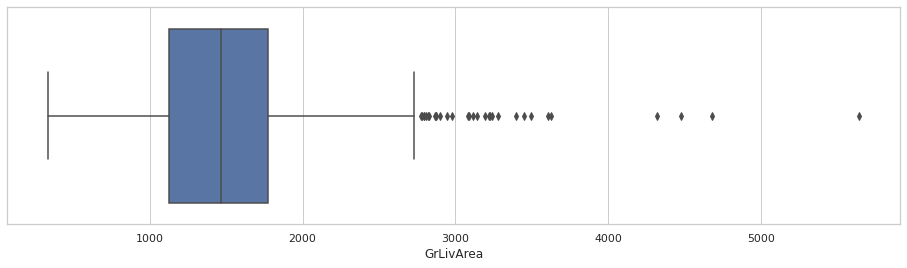

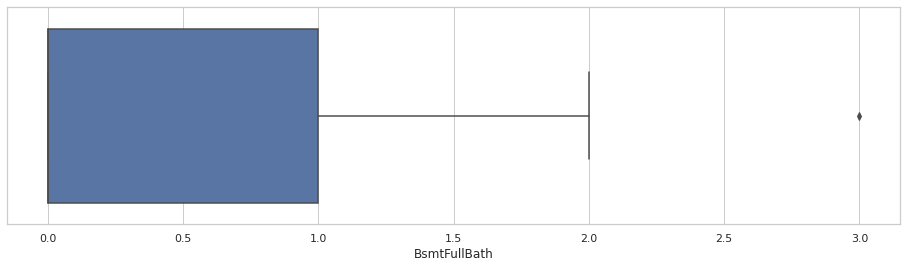

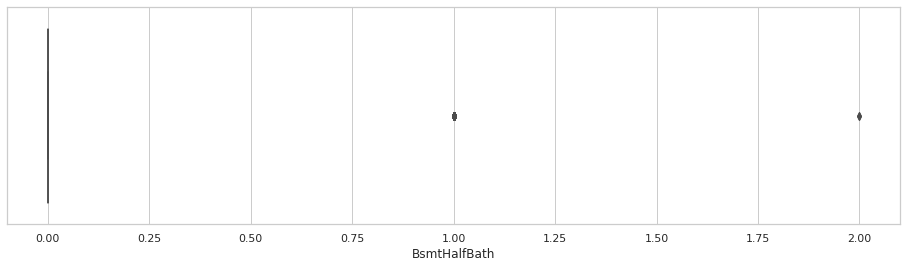

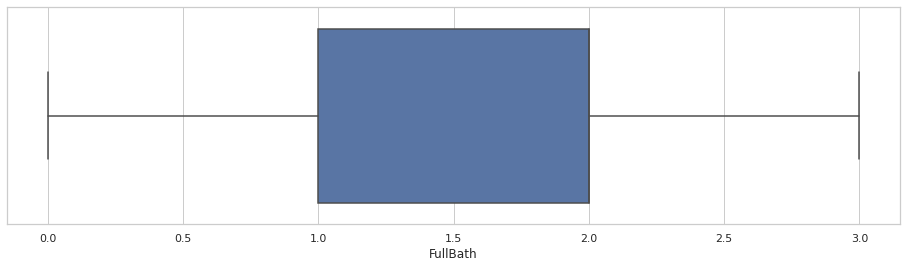

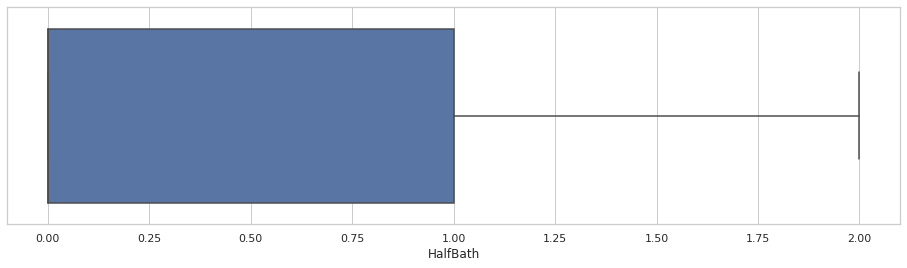

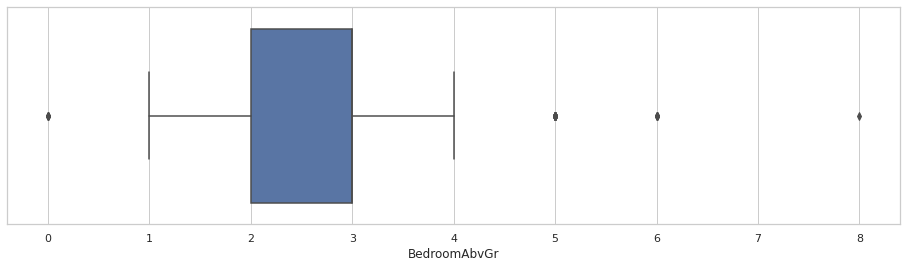

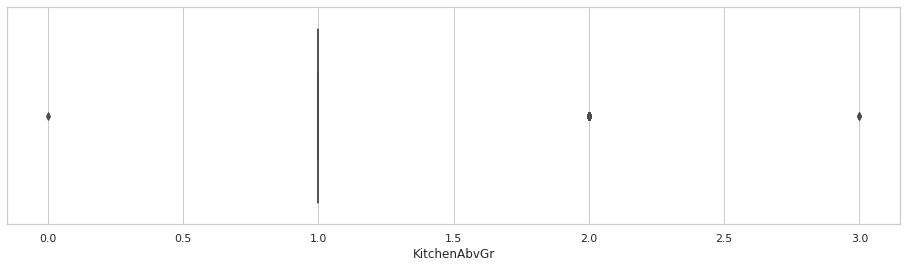

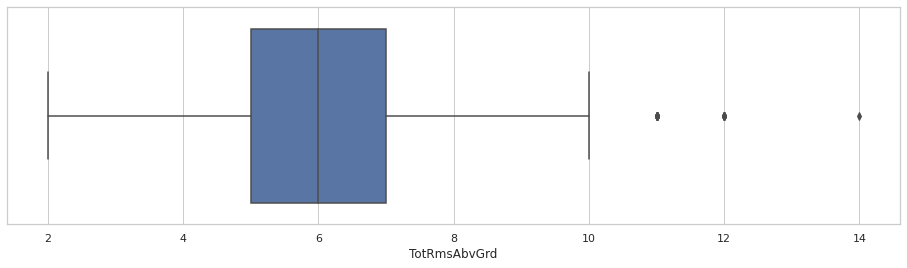

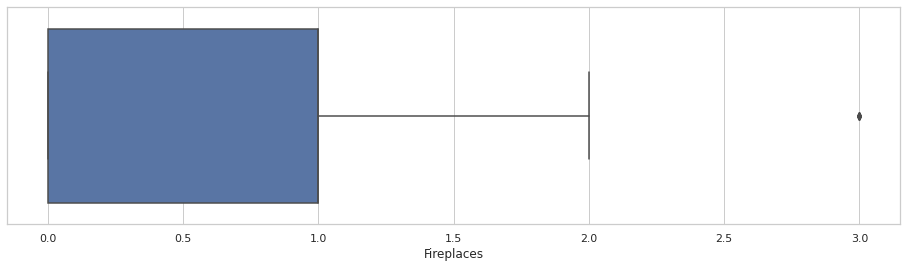

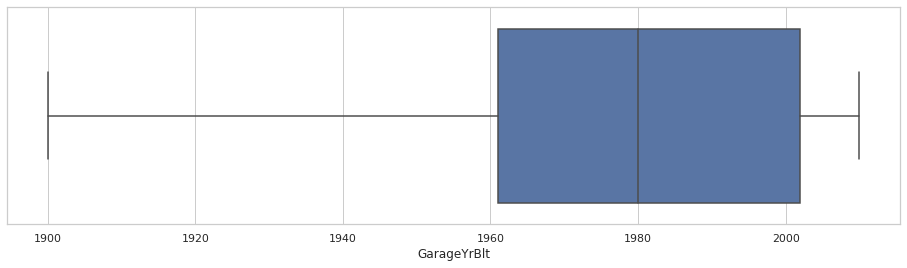

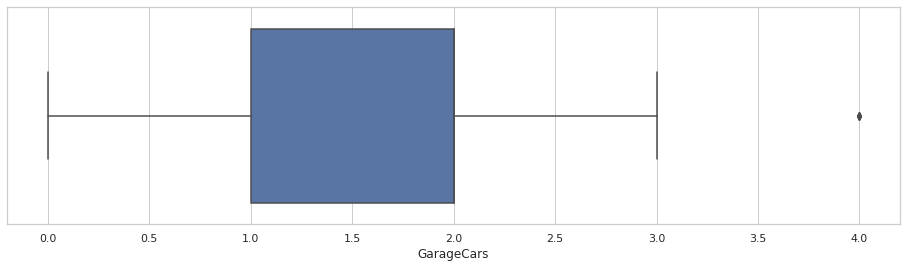

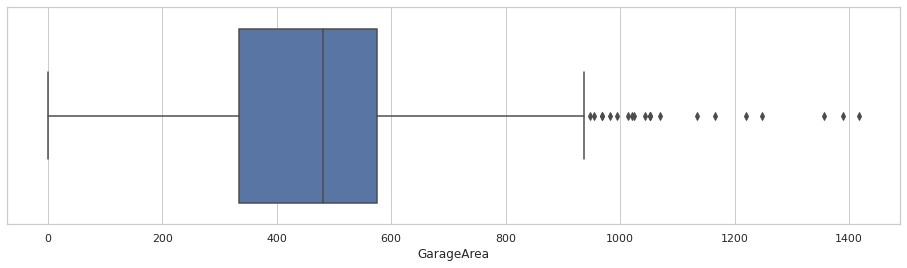

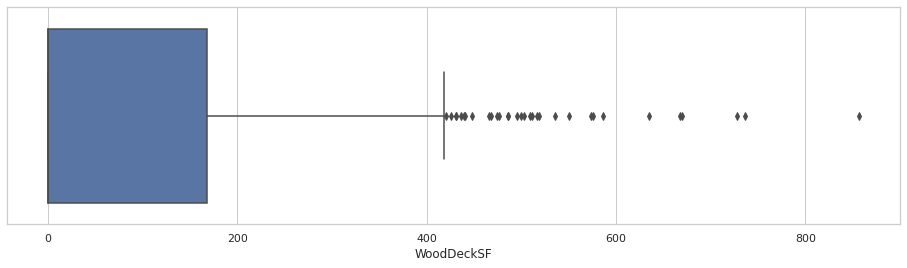

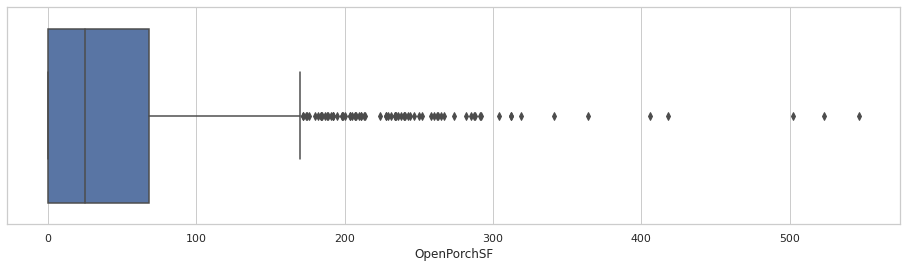

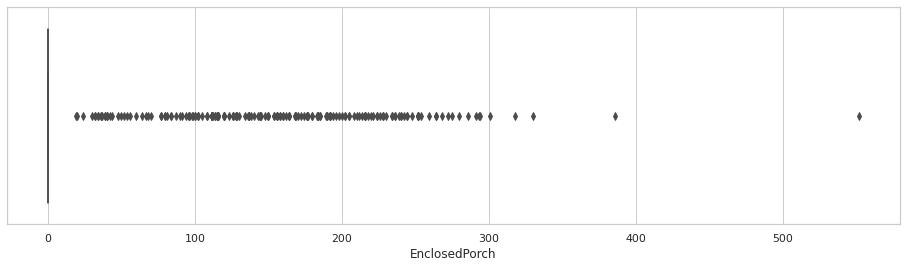

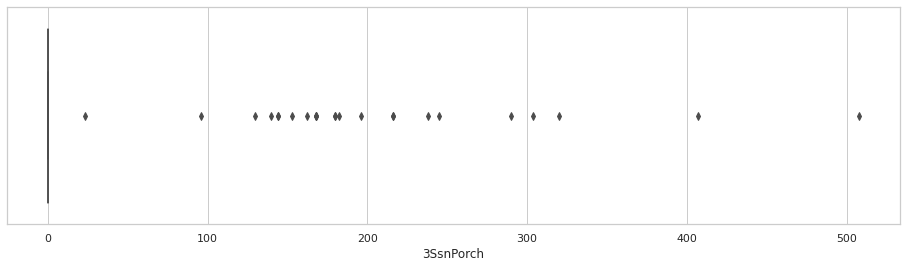

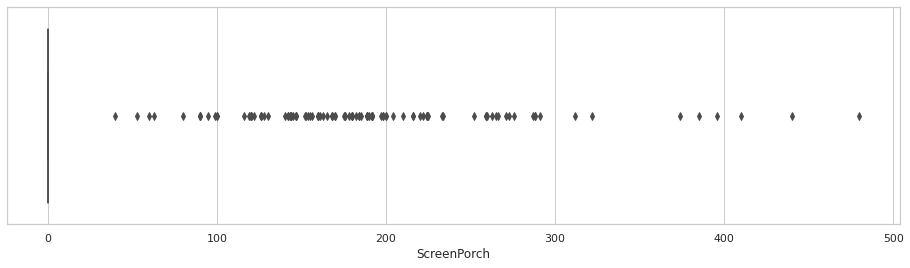

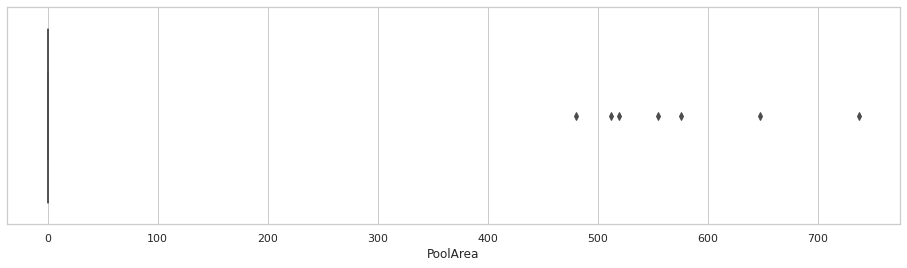

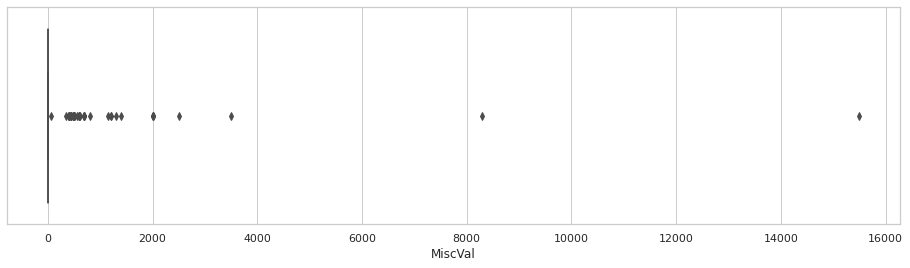

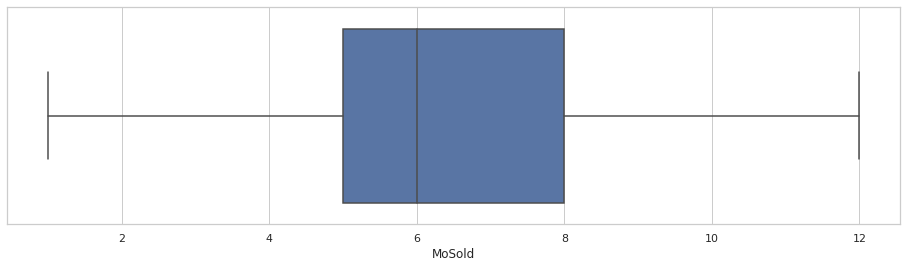

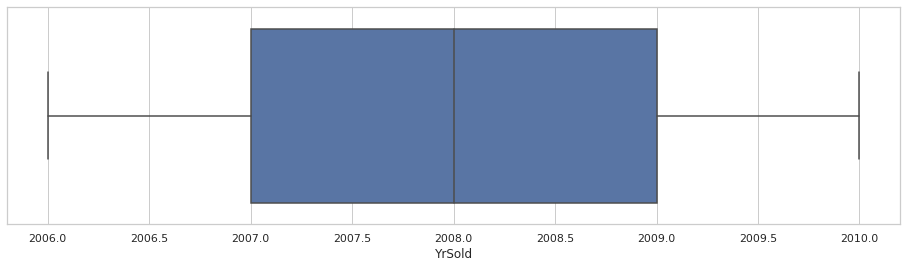

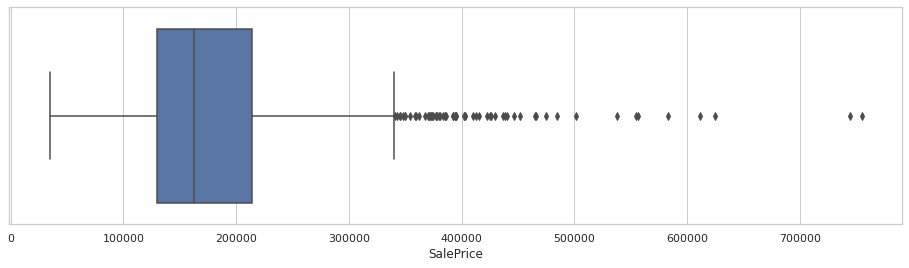

In [10]:
# find outliers for all the numerical dataset (before handling missing values)
numerical_df = df_train.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

In [11]:
#features present in train data that are not present in test data
feature_train_not_test = [col for col in df_train.columns if col not in df_test.columns and col != 'SalePrice']
print(feature_train_not_test)

[]


In [12]:
#features present in test data that are not present in train data
feature_test_not_train = [col for col in df_test.columns if col not in df_train.columns]
print(feature_test_not_train)

[]


**Observation**: Train and Test data have the exact same features (not considering the target feature 'SalePrice')

In [13]:
#combine train and test data for data preprocessing
df_merge=pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])
df_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


In [14]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## Impute missing Categorical features

In [15]:
#Get a list of all the categorical features that have the keyword 'Qual' OR 'Cond' OR 'Qu' OR 'QC' in the feature name
feature_rating_Qual = [col for col in df_merge.columns if 'Qual' in col and df_merge[col].dtypes=='object']
feature_rating_Cond = [col for col in df_merge.columns if 'Cond' in col and col not in ['Condition1', 'Condition2', 'SaleCondition'] and df_merge[col].dtypes=='object']
feature_rating_Qu = [col for col in df_merge.columns if 'Qu' in col and df_merge[col].dtypes=='object' and col not in feature_rating_Qual]
feature_rating_QC = [col for col in df_merge.columns if 'QC' in col and df_merge[col].dtypes=='object']

cat_feature_with_rating = feature_rating_Qual + feature_rating_Cond + feature_rating_Qu + feature_rating_QC

for x in cat_feature_with_rating:
    print(x)

ExterQual
BsmtQual
KitchenQual
GarageQual
ExterCond
BsmtCond
GarageCond
FireplaceQu
HeatingQC
PoolQC


In [16]:
#Categorical features who have NA as a correct value
cat_feature_with_legit_na = ['Alley', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'Fence', 'MiscFeature']
df_merge[cat_feature_with_legit_na].head()

,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,NaN,No,Rec,LwQ,Attchd,Unf,MnPrv,NaN
1,NaN,No,ALQ,Unf,Attchd,Unf,NaN,Gar2
2,NaN,No,GLQ,Unf,Attchd,Fin,MnPrv,NaN
3,NaN,No,GLQ,Unf,Attchd,Fin,NaN,NaN
4,NaN,No,ALQ,Unf,Attchd,RFn,NaN,NaN


In [17]:
ordinal_cat_features = cat_feature_with_rating + cat_feature_with_legit_na
df_merge[ordinal_cat_features].head()

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,GarageCond,FireplaceQu,HeatingQC,PoolQC,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,TA,TA,TA,TA,TA,TA,TA,NaN,TA,NaN,NaN,No,Rec,LwQ,Attchd,Unf,MnPrv,NaN
1,TA,TA,Gd,TA,TA,TA,TA,NaN,TA,NaN,NaN,No,ALQ,Unf,Attchd,Unf,NaN,Gar2
2,TA,Gd,TA,TA,TA,TA,TA,TA,Gd,NaN,NaN,No,GLQ,Unf,Attchd,Fin,MnPrv,NaN
3,TA,TA,Gd,TA,TA,TA,TA,Gd,Ex,NaN,NaN,No,GLQ,Unf,Attchd,Fin,NaN,NaN
4,Gd,Gd,Gd,TA,TA,TA,TA,NaN,Ex,NaN,NaN,No,ALQ,Unf,Attchd,RFn,NaN,NaN


In [18]:
#On checking the data description, Missing is valid in some categorical
#Handling Missing Values in Ordinal Categorical features by replacing them with 'Missing' keyword
df_merge[ordinal_cat_features] = df_merge[ordinal_cat_features].fillna("Missing")

#Making sure the missing values have been handled
print(get_cols_with_missing_values(df_merge[ordinal_cat_features]))

Series([], dtype: int64)


In [19]:
#Get categorical and numerical columns
categorical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes=='object' and cname!='ind']
remaining_cat_cols = [cname for cname in categorical_cols if cname not in ordinal_cat_features]

numerical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes!='object' and cname!='SalePrice']

In [20]:
df_merge[remaining_cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,SBrkr,Typ,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,Y,SBrkr,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,PConc,GasA,Y,SBrkr,Typ,Y,WD,Normal


In [21]:
#Handling Missing Values in Categorical features by replacing them with the feature mode value
for col in remaining_cat_cols:
    df_merge[col] = df_merge[col].fillna(df_merge[col].mode()[0])  


#Making sure the missing values have been handled
print(get_cols_with_missing_values(df_merge[remaining_cat_cols]))

Series([], dtype: int64)


## Impute missing Numerical features

In [22]:
#Handling Missing Values in Numerical features by replacing them with Mean value
df_merge[numerical_cols]=df_merge[numerical_cols].fillna(df_merge[numerical_cols].mean())

#Making sure the missing values have been handled
print(get_cols_with_missing_values(df_merge[numerical_cols]))

Series([], dtype: int64)


In [23]:
#Select categorical columns with low cardinality
categorical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes=='object' and df_merge[cname].nunique()<10]
numerical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes!='object']

# Keep selected columns only
my_cols = numerical_cols + categorical_cols
df_merge_clean = df_merge[my_cols].copy()

In [24]:
print(get_cols_with_missing_values(df_merge_clean))

SalePrice    1459
dtype: int64


In [25]:
df_merge_clean.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,ind
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,NaN,RH,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal,test
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,NaN,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Gar2,WD,Normal,test
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,NaN,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal,test
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,NaN,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal,test
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,NaN,RL,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,1Story,Gable,CompShg,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal,test


# Feature Engineering

In [26]:
#Drop 'Id' feature
df_merge_clean.drop('Id', axis=1, inplace=True)

In [27]:
#Handling years
df_merge_clean['GarageYrBlt'] = df_merge_clean['GarageYrBlt'].astype('int')
df_merge_clean['GarageYrBlt'] = df_merge_clean['YrSold'] - df_merge_clean['GarageYrBlt']

df_merge_clean['YearBuilt'] = df_merge_clean['YrSold'] - df_merge_clean['YearBuilt']

df_merge_clean['YearRemodAdd'] = df_merge_clean['YrSold'] - df_merge_clean['YearRemodAdd']

df_merge_clean.drop(["YrSold"], axis=1, inplace=True)
df_merge_clean.drop(["MoSold"], axis=1, inplace=True)

In [28]:
#TotalBsmtSF(Total square feet of basement area) = BsmtFinSF1(Type 1 finished square feet) + BsmtFinSF2(Type 2 finished square feet) + BsmtUnfSF(Unfinished square feet of basement area)
df_merge_clean.drop(["TotalBsmtSF"], axis=1, inplace=True)

#Basement finished area
df_merge_clean['BsmtFinSF'] = df_merge_clean['BsmtFinSF1'] + df_merge_clean['BsmtFinSF2']
df_merge_clean.drop(["BsmtFinSF1"], axis=1, inplace=True)
df_merge_clean.drop(["BsmtFinSF2"], axis=1, inplace=True)

In [29]:
#Total floor square feet
df_merge_clean['TotalFlrSF'] = df_merge_clean['1stFlrSF'] + df_merge_clean['2ndFlrSF']
df_merge_clean.drop(["1stFlrSF"], axis=1, inplace=True)
df_merge_clean.drop(["2ndFlrSF"], axis=1, inplace=True)

In [30]:
#Total Bathrooms
df_merge_clean['Total_Bath'] = (df_merge_clean['FullBath'] + (0.5*df_merge_clean['HalfBath']) + df_merge_clean['BsmtFullBath'] + (0.5*df_merge_clean['BsmtHalfBath']))
df_merge_clean.drop(["FullBath"], axis=1, inplace=True)
df_merge_clean.drop(["HalfBath"], axis=1, inplace=True)
df_merge_clean.drop(["BsmtFullBath"], axis=1, inplace=True)
df_merge_clean.drop(["BsmtHalfBath"], axis=1, inplace=True)

# Feature Transformation

In [31]:
#Perform log normal distribution on the skewed nuerical features
import scipy.stats

numerical_cols = [cname for cname in df_merge_clean.columns if df_merge_clean[cname].dtypes!='object' and cname!='SalePrice']

skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df_merge_clean[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,MSSubClass,1.375457,1.375457,True
1,LotFrontage,1.645574,1.645574,True
2,LotArea,12.822431,12.822431,True
3,OverallQual,0.197110,0.197110,False
4,OverallCond,0.570312,0.570312,True
5,YearBuilt,0.598609,0.598609,True
6,YearRemodAdd,0.450226,0.450226,False
7,MasVnrArea,2.611549,2.611549,True
8,BsmtUnfSF,0.919508,0.919508,True
9,LowQualFinSF,12.088761,12.088761,True


In [32]:
df_merge_clean[numerical_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtFinSF,TotalFlrSF,Total_Bath
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,36.479959,23.528263,102.201312,560.772104,4.694416,1500.759849,2.860226,1.044536,6.451524,0.597122,29.685509,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,491.005483,1496.065433,2.218712
std,42.517628,21.312345,7886.996359,1.409947,1.113131,30.336182,20.892061,178.626089,439.468337,46.396825,506.051045,0.822693,0.214462,1.569379,0.646129,24.908326,0.761494,215.357904,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,477.123276,503.675790,0.808943
min,20.000000,21.000000,1300.000000,1.000000,1.000000,-1.000000,-2.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,7.000000,4.000000,0.000000,220.000000,0.000000,1126.000000,2.000000,1.000000,5.000000,0.000000,7.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1120.000000,1.500000
50%,50.000000,69.305795,9453.000000,6.000000,5.000000,35.000000,15.000000,0.000000,467.000000,0.000000,1444.000000,3.000000,1.000000,6.000000,1.000000,29.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,458.000000,1440.000000,2.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,54.500000,43.000000,163.500000,805.000000,0.000000,1743.500000,3.000000,1.000000,7.000000,1.000000,46.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,805.500000,1742.500000,2.500000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,136.000000,60.000000,1600.000000,2336.000000,1064.000000,5642.000000,8.000000,3.000000,15.000000,4.000000,114.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,5644.000000,5642.000000,7.000000


**Observation**: The minimum value for few numerical features in 0. So we cannot apply log transformation, as the log(0) is infinity. So we will apply **lop1p** transformation

In [33]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_merge_clean[column] = np.log1p(df_merge_clean[column])

# Encode Categorical features

In data description, the values given for 'OverallQual' feature are as follows- 10:Very Excellent ,9:Excellent ,8:Very Good ,7:Good ,6:Above Average ,5:Average ,4:Below Average ,3:Fair ,2:Poor ,1:Very Poor

So we will try to convert categorical features having qualities as per the above example

In [34]:
#Before encoding - features with rating
df_merge_clean[cat_feature_with_rating]

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,GarageCond,FireplaceQu,HeatingQC,PoolQC
0,TA,TA,TA,TA,TA,TA,TA,Missing,TA,Missing
1,TA,TA,Gd,TA,TA,TA,TA,Missing,TA,Missing
2,TA,Gd,TA,TA,TA,TA,TA,TA,Gd,Missing
3,TA,TA,Gd,TA,TA,TA,TA,Gd,Ex,Missing
4,Gd,Gd,Gd,TA,TA,TA,TA,Missing,Ex,Missing
...,...,...,...,...,...,...,...,...,...,...
1455,TA,Gd,TA,TA,TA,TA,TA,TA,Ex,Missing
1456,TA,Gd,TA,TA,TA,TA,TA,TA,TA,Missing
1457,Ex,TA,Gd,TA,Gd,Gd,TA,Gd,Ex,Missing
1458,TA,TA,Gd,TA,TA,TA,TA,Missing,Gd,Missing


In [35]:
for col in cat_feature_with_rating:
    if 'Missing' in df_merge_clean[col].value_counts().index:
        df_merge_clean[col] = df_merge_clean[col].map({"Missing":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})
    else:
        df_merge_clean[col] = df_merge_clean[col].map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [36]:
#After encoding - features with rating
df_merge_clean[cat_feature_with_rating]

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,GarageCond,FireplaceQu,HeatingQC,PoolQC
0,3,3,3,3,3,3,3,0,3,0
1,3,3,4,3,3,3,3,0,3,0
2,3,4,3,3,3,3,3,3,4,0
3,3,3,4,3,3,3,3,4,5,0
4,4,4,4,3,3,3,3,0,5,0
...,...,...,...,...,...,...,...,...,...,...
1455,3,4,3,3,3,3,3,3,5,0
1456,3,4,3,3,3,3,3,3,3,0
1457,5,3,4,3,4,4,3,4,5,0
1458,3,3,4,3,3,3,3,0,4,0


In [37]:
#features with legit na
df_merge_clean[cat_feature_with_legit_na]

,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,Missing,No,Rec,LwQ,Attchd,Unf,MnPrv,Missing
1,Missing,No,ALQ,Unf,Attchd,Unf,Missing,Gar2
2,Missing,No,GLQ,Unf,Attchd,Fin,MnPrv,Missing
3,Missing,No,GLQ,Unf,Attchd,Fin,Missing,Missing
4,Missing,No,ALQ,Unf,Attchd,RFn,Missing,Missing
...,...,...,...,...,...,...,...,...
1455,Missing,No,Unf,Unf,Attchd,RFn,Missing,Missing
1456,Missing,No,ALQ,Rec,Attchd,Unf,MnPrv,Missing
1457,Missing,No,GLQ,Unf,Attchd,RFn,GdPrv,Shed
1458,Missing,Mn,GLQ,Rec,Attchd,Unf,Missing,Missing


In [38]:
#Exclude 'Alley', MiscFeature' and 'GarageType' feature as they are not ordinal
df_merge_clean['BsmtExposure'] = df_merge_clean['BsmtExposure'].map({"Missing":0,"No":1,"Mn":2,"Av":3,"Gd":4}).astype('int')
df_merge_clean['BsmtFinType1'] = df_merge_clean['BsmtFinType1'].map({"Missing":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}).astype('int')
df_merge_clean['BsmtFinType2'] = df_merge_clean['BsmtFinType2'].map({"Missing":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}).astype('int')
df_merge_clean['GarageFinish'] = df_merge_clean['GarageFinish'].map({"Missing":0,"Unf":1,"RFn":2,"Fin":3}).astype('int')
df_merge_clean['Fence'] = df_merge_clean['Fence'].map({"Missing":0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4}).astype('int')

In [39]:
#There are few other features where rank can be applied
df_merge_clean['LotShape'] = df_merge_clean['LotShape'].map({"IR3":1,"IR2":2,"IR1":3,"Reg":4}).astype('int')
df_merge_clean['LandContour'] = df_merge_clean['LandContour'].map({"Low":1,"Bnk":2,"HLS":3,"Lvl":4}).astype('int')
df_merge_clean['Utilities'] = df_merge_clean['Utilities'].map({"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4}).astype('int')
df_merge_clean['LandSlope'] = df_merge_clean['LandSlope'].map({"Sev":1,"Mod":2,"Gtl":3}).astype('int')
df_merge_clean['CentralAir'] = df_merge_clean['CentralAir'].map({"N":0,"Y":1}).astype('int')
df_merge_clean['PavedDrive'] = df_merge_clean['PavedDrive'].map({"N":0,"P":1,"Y":2}).astype('int')

In [40]:
#Categorical features remaining to be encoded
cat_remaining_to_encode = [col for col in df_merge_clean.columns if df_merge_clean[col].dtypes=='object' and col !='ind']

print(cat_remaining_to_encode)

['MSZoning', 'Street', 'Alley', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']


In [41]:
df_merge_clean_dummies = pd.get_dummies(df_merge_clean[cat_remaining_to_encode],drop_first=True)

df_merge_clean.drop(cat_remaining_to_encode,axis=1,inplace=True)

df_merge_clean = pd.concat([df_merge_clean,df_merge_clean_dummies],axis=1)

# Feature Scaling 

In [42]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_to_be_scaled = [col for col in df_merge_clean.columns if col not in ['SalePrice', 'ind']]
scaler.fit(df_merge_clean[features_to_be_scaled])

df_merge_clean[features_to_be_scaled] = pd.DataFrame(scaler.transform(df_merge_clean[features_to_be_scaled]), index=df_merge_clean[features_to_be_scaled].index, columns=df_merge_clean[features_to_be_scaled].columns)
'''

"from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\n\nfeatures_to_be_scaled = [col for col in df_merge_clean.columns if col not in ['SalePrice', 'ind']]\nscaler.fit(df_merge_clean[features_to_be_scaled])\n\ndf_merge_clean[features_to_be_scaled] = pd.DataFrame(scaler.transform(df_merge_clean[features_to_be_scaled]), index=df_merge_clean[features_to_be_scaled].index, columns=df_merge_clean[features_to_be_scaled].columns)\n"

# Split Train and Test data

In [43]:
test, train= df_merge_clean[df_merge_clean["ind"].eq("test")], df_merge_clean[df_merge_clean["ind"].eq("train")]
test.drop(["SalePrice", "ind"], axis=1, inplace=True)
train.drop(["ind"], axis=1, inplace=True)

In [44]:
log_target = np.log(train['SalePrice'])
train.drop(["SalePrice"], axis=1, inplace=True)

In [45]:
train.shape, test.shape

((1460, 144), (1459, 144))

In [46]:
'''X = train.loc[:, train.columns!='SalePrice']
#y = train['SalePrice']
#TARGET feature encoding
y = np.log(train.SalePrice)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Validation', X_valid.shape, y_valid.shape)'''

"X = train.loc[:, train.columns!='SalePrice']\n#y = train['SalePrice']\n#TARGET feature encoding\ny = np.log(train.SalePrice)\n\n# Break off validation set from training data\nX_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)\n\n# summarize\nprint('Train', X_train.shape, y_train.shape)\nprint('Validation', X_valid.shape, y_valid.shape)"

# Build Model

In [47]:
'''from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# A parameter grid for XGBoost
params = {
    'n_estimators':[100,200,400,600,800,900,1000],
    'learning_rate':[0.05,0.1,0.15],
    'min_child_weight':[i for i in range(1,5)], 
    'gamma':[0.1*i for i in range(1,10)],  
    'subsample':[0.1*i for i in range(6,11)],
    'colsample_bytree':[0.1*i for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
}

regressor = XGBRegressor()
#RandomizedSearchCV
random_search = RandomizedSearchCV(regressor, param_distributions=params,n_iter=5, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')

random_search.fit(X_train, y_train)'''

"from xgboost import XGBRegressor\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# A parameter grid for XGBoost\nparams = {\n    'n_estimators':[100,200,400,600,800,900,1000],\n    'learning_rate':[0.05,0.1,0.15],\n    'min_child_weight':[i for i in range(1,5)], \n    'gamma':[0.1*i for i in range(1,10)],  \n    'subsample':[0.1*i for i in range(6,11)],\n    'colsample_bytree':[0.1*i for i in range(6,11)], \n    'max_depth': [2,3,4,6,7],\n    'objective': ['reg:squarederror', 'reg:tweedie'],\n    'booster': ['gbtree', 'gblinear'],\n    'eval_metric': ['rmse'],\n}\n\nregressor = XGBRegressor()\n#RandomizedSearchCV\nrandom_search = RandomizedSearchCV(regressor, param_distributions=params,n_iter=5, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')\n\nrandom_search.fit(X_train, y_train)"

In [48]:
'''best_regressor = random_search.best_estimator_
print(best_regressor)'''

'best_regressor = random_search.best_estimator_\nprint(best_regressor)'

## Bagging Ensemble

In [49]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [50]:
catboost_params = {
    'iterations': 5000,
    'learning_rate': 0.02,
    'depth': 4,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 20
}

xgboost_params = {
    'n_estimators': 5000,
    'learning_rate': 0.02,
    'colsample_bytree': 0.5,
    'subsample': 0.5,
    'min_child_weight': 2,
    'early_stopping_rounds': 20   
}

In [51]:
models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),
    "xgb": XGBRegressor(**xgboost_params, verbose=0)
}

In [52]:
for name, model in models.items():
    model.fit(train, log_target)
    print(name + " trained.")

catboost trained.
[18:20:58] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


xgb trained.


In [53]:
from sklearn.model_selection import KFold, cross_val_score
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

[18:22:44] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:13] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:43] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passe

In [54]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
catboost
1.129964028148883
0.019911154033077395
----------
xgb
1.1308123164779287
0.018442026534403393


In [55]:
from sklearn.metrics import mean_absolute_error
#Combine predictions
final_predictions = (
    0.5 * np.exp(models['catboost'].predict(test)) +
    0.5 * np.exp(models['xgb'].predict(test))
)

In [56]:
'''# Calculate MAE
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_valid)
rmse_pred = mean_absolute_error(y_valid, y_pred) 
print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))'''

'# Calculate MAE\nfrom sklearn.metrics import mean_absolute_error\n\ny_pred = model.predict(X_valid)\nrmse_pred = mean_absolute_error(y_valid, y_pred) \nprint("Root Mean Absolute Error:" , np.sqrt(rmse_pred))'

In [57]:
'''# Get test predictions
preds_test = model.predict(test)

final_predictions = np.exp(preds_test)'''

'# Get test predictions\npreds_test = model.predict(test)\n\nfinal_predictions = np.exp(preds_test)'

In [58]:
# Save test predictions to file
output = pd.DataFrame({'Id': test.index+1461,
                       'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)